<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/Plot_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code is used to demonstrate the result of pairwise rumor spread on a network. In this example, the network size is 400, with degree exponent of 2.5, and minimum degree of 3. The heatmap shows the stifler density with varying transmission rate while setting the threshold constant to 0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math as math
from math import log
import seaborn as sns
import pandas as pd

In [2]:
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n))
    #kmax = int(1.5*n**(1/4)) # max degree allowed is 1.5*n^(1/4)
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

Degree sequence: [(0, 3), (1, 3), (2, 4), (3, 16), (4, 4), (5, 3), (6, 3), (7, 5), (8, 3), (9, 3), (10, 3), (11, 11), (12, 4), (13, 4), (14, 7), (15, 3), (16, 5), (17, 3), (18, 7), (19, 4), (20, 13), (21, 3), (22, 3), (23, 3), (24, 4), (25, 12), (26, 8), (27, 3), (28, 6), (29, 7), (30, 3), (31, 5), (32, 4), (33, 5), (34, 4), (35, 10), (36, 6), (37, 3), (38, 3), (39, 3), (40, 3), (41, 3), (42, 3), (43, 3), (44, 5), (45, 6), (46, 4), (47, 6), (48, 6), (49, 3), (50, 3), (51, 3), (52, 4), (53, 6), (54, 4), (55, 4), (56, 3), (57, 3), (58, 3), (59, 3), (60, 10), (61, 3), (62, 3), (63, 3), (64, 9), (65, 3), (66, 3), (67, 3), (68, 3), (69, 3), (70, 5), (71, 3), (72, 3), (73, 4), (74, 6), (75, 3), (76, 3), (77, 3), (78, 13), (79, 3), (80, 4), (81, 3), (82, 4), (83, 5), (84, 15), (85, 3), (86, 6), (87, 5), (88, 6), (89, 3), (90, 3), (91, 3), (92, 4), (93, 8), (94, 3), (95, 3), (96, 3), (97, 5), (98, 9), (99, 3), (100, 3), (101, 3), (102, 3), (103, 3), (104, 3), (105, 3), (106, 3), (107, 3), (108

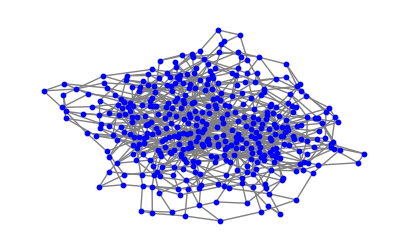

In [35]:
degree_sequence = generate_degree_sequence(400, 2.5, 3)

G = nx.configuration_model(degree_sequence)

# Print the resulting graph's degree sequence
print("Degree sequence:", list(G.degree()))

# draw the graph
fig, ax = plt.subplots(figsize=(5,3))
nx.draw(G, node_color="blue", node_size=10, edge_color="grey", width=1, with_labels=False)

plt.show()